In [6]:
import timm 

timm.list_models()

['bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_large_patch16_224',
 'botnet26t_256',
 'botnet50ts_256',
 'caformer_b36',
 'caformer_m36',
 'caformer_s18',
 'caformer_s36',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_medium',
 'coat_lite_medium_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_small',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet_rmlp_0_rw_224',
 'coatnet_rmlp_1_rw2_224',
 'coatnet_rmlp_1_r

In [27]:
import numpy
import timm
import torch
# 모델 이름과 pretrained 옵션을 지정합니다.
model_name = 'vit_base_patch16_224'  # 예시로 'vit_base_patch16_224' 모델을 사용합니다.
pretrained = True  # pretrained 옵션을 True로 설정하여 사전 학습된 가중치를 가져옵니다.

# timm 라이브러리를 사용하여 모델을 가져옵니다.
model = timm.create_model(model_name, pretrained=pretrained)

In [34]:
model.pos_embed[:,1:,:].shape

torch.Size([1, 196, 768])

In [35]:
model.pos_embed[:,1:,:].reshape(14,14,-1).shape

torch.Size([14, 14, 768])

In [38]:
model.pos_embed[:,1:,:].reshape(28*14,-1).shape

torch.Size([448, 336])

I want to change its shape [1,197,768] to [1,3201,768]

due to 197 = 224/16 * 224/16 +1

new shape = 800/16 * 1024/16 +1

In [14]:
with torch.no_grad():
    model.head.weight.zero_()
    model.head.bias.zero_()

In [8]:
#torvision transformer

import torchvision.models as models

model = models.vit_b_16()

In [1]:
#torvision resize

import torchvision.transforms as transform
import pandas as pd
# MNIST 데이터셋 로드
# train_set = torchvision.datasets.Image(
#     root = './data/Imagenette',
#     download = True,
#     transform= transform.Resize(size=(800,1024), interpolation=transform.InterpolationMode.BICUBIC)
# )

onlyWolf = pd.read_csv('./data/imagewoof2/noisy_imagewoof.csv')

onlyWolf[:3]

,path,noisy_labels_0,noisy_labels_1,noisy_labels_5,noisy_labels_25,noisy_labels_50,is_valid
0,train/n02115641/n02115641_3995.JPEG,n02115641,n02115641,n02115641,n02115641,n02115641,False
1,train/n02115641/n02115641_843.JPEG,n02115641,n02115641,n02105641,n02115641,n02088364,False
2,train/n02115641/n02115641_2953.JPEG,n02115641,n02115641,n02115641,n02111889,n02099601,False


In [2]:
len(onlyWolf[onlyWolf['is_valid']==False])
#valid data = 3929
#training data = 9025


9025

In [3]:
len({1:1,2:2})

2

In [9]:
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, ToPILImage,Resize
import os
from PIL import Image
import numpy as np
import torch
import pandas as pd
class lonelyWolfDataset(Dataset):
    """
    Load data from ./data/imagewoof2 
    read_csv file first.
    """
    def __init__(self, csv_file="./data/imagewoof2/noisy_imagewoof.csv", root_dir = "./data/imagewoof2", transform=None,is_valid = False,num_label = 10) -> None:
        super().__init__()
        df = pd.read_csv(csv_file)
        self.inform =  df[df['is_valid']== is_valid]
        self.root_dir = root_dir
        self.transform = transform
        self.is_valid = is_valid
        self.mapper = {}
    def __len__(self):
        return  len(self.inform)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        # print(self.root_dir+"/"+self.inform.iloc[idx, 0])
        img_name = self.root_dir+"/"+self.inform.iloc[idx, 0]
        image = Image.open(img_name).convert("RGB")
        toTensor = ToTensor()
        reSize = Resize(size=(800,1024),)
        image = reSize(toTensor(image))
        #defalut dict 같은것 써도 무방
        label=0
        if self.inform.iloc[idx,1] in self.mapper:
            label = self.mapper[self.inform.iloc[idx,1]]
        else:
            label= len(self.mapper)
            self.mapper[self.inform.iloc[idx,1]] = label
        
        sample = {'image': image, 'label': label}

        return sample
    

    

In [10]:
trainwolf = lonelyWolfDataset()
valwolf = lonelyWolfDataset(is_valid=True)

0 torch.Size([3, 800, 1024]) 0


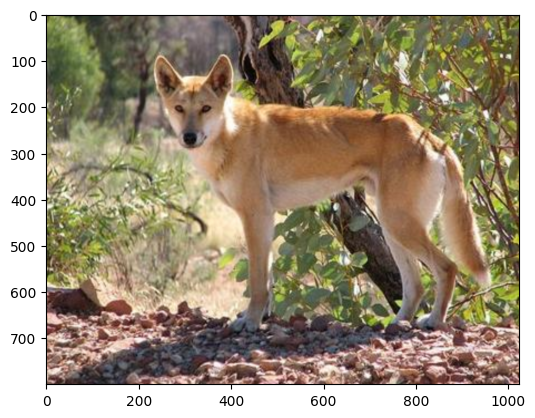

1 torch.Size([3, 800, 1024]) 0
2 torch.Size([3, 800, 1024]) 0
3 torch.Size([3, 800, 1024]) 0


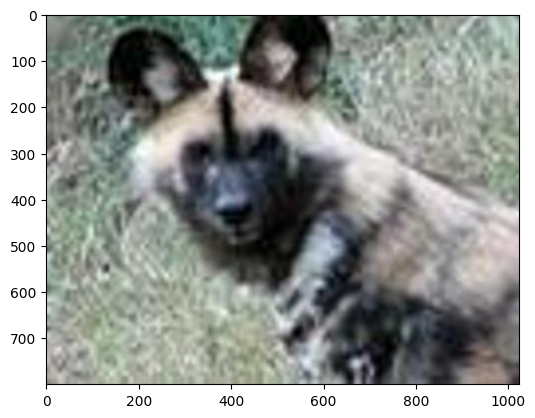

4 torch.Size([3, 800, 1024]) 0
5 torch.Size([3, 800, 1024]) 0
6 torch.Size([3, 800, 1024]) 0


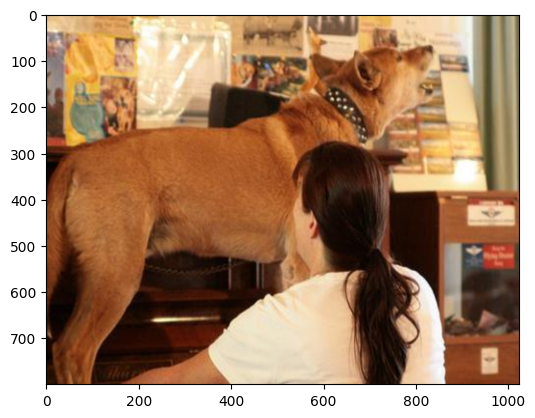

7 torch.Size([3, 800, 1024]) 0
8 torch.Size([3, 800, 1024]) 0
9 torch.Size([3, 800, 1024]) 0


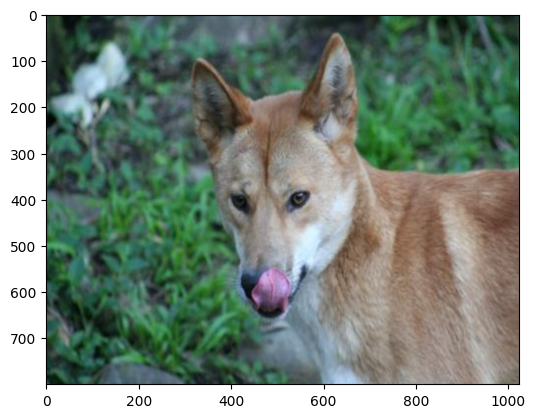

10 torch.Size([3, 800, 1024]) 0


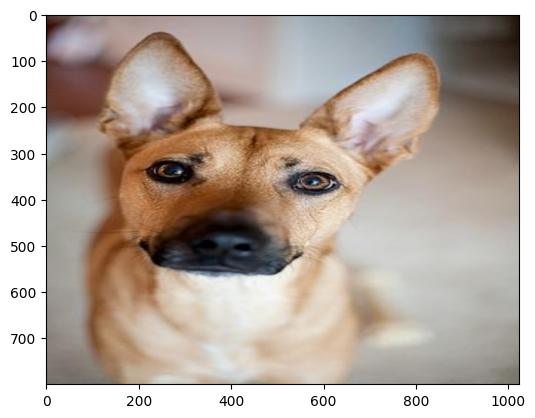

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()

for i, sample in enumerate(trainwolf):
    print(i, sample['image'].shape,sample['label'])

    plt.imshow( sample['image'].permute(1, 2, 0) )

    if i % 3 ==0:
        plt.show()
    if i == 10:
        break

In [12]:
from transformers import ViTModel,ViTConfig
import torch
device ='cpu'
if torch.cuda.is_available():
    device ='cuda'
    
print(f"device : {device}")

config = ViTConfig.from_pretrained('google/vit-base-patch16-224-in21k')  # 이미지넷으로 사전 학습된 모델의 configuration 불러오기

# 이미지 크기와 관련된 configuration 설정
config.image_size = (800, 1024)  # 이미지 크기 설정
config.num_patches = (800// 16) * (1024 // 16)  # 패치 개수 재설정
# 이미지넷으로 사전 학습된 모델의 가중치 불러오기
model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k', config=config,ignore_mismatched_sizes=True)

# model= timm.models.VisionTransformer(img_size=(800,1024),patch_size=16,num_classes=10)


device : cuda


Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized because the shapes did not match:
- embeddings.position_embeddings: found shape torch.Size([1, 197, 768]) in the checkpoint and torch.Size([1, 3201, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [13]:
# Training settings
import random
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim
from tqdm import tqdm
batch_size = 32
epochs = 10
lr = 3e-5
gamma = 0.7
seed = 42
model.to(device='cuda')

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True

seed_everything(1234)
model.to(device=device)

trainDataLoader = DataLoader(trainwolf, batch_size=batch_size,shuffle=True, num_workers=0)
valDataLoader = DataLoader(valwolf, batch_size=batch_size,shuffle=True, num_workers=0)
lr = 5.0  # learning rate
# loss function
criterion = nn.CrossEntropyLoss()
# optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
# scheduler
scheduler = StepLR(optimizer, step_size=1, gamma=gamma)

In [14]:

for epoch in range(epochs):
    epoch_loss = 0
    epoch_accuracy = 0

    for sample in tqdm(trainDataLoader):
        
        data = sample['image'].to(device)
        label = sample['label'].to(device)

        output = model(data)
        loss = criterion(output, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        acc = (output.argmax(dim=1) == label).float().mean()
        epoch_accuracy += acc / len(trainDataLoader)
        epoch_loss += loss / len(trainDataLoader)
    with torch.no_grad():
        epoch_val_accuracy = 0
        epoch_val_loss = 0
        for data, label in valDataLoader:
            data = data.to(device)
            label = label.to(device)

            val_output = model(data)
            val_loss = criterion(val_output, label)

            acc = (val_output.argmax(dim=1) == label).float().mean()
            epoch_val_accuracy += acc / len(valDataLoader)
            epoch_val_loss += val_loss / len(valDataLoader)

    print(
        f"Epoch : {epoch+1} - loss : {epoch_loss:.4f} - acc: {epoch_accuracy:.4f} - val_loss : {epoch_val_loss:.4f} - val_acc: {epoch_val_accuracy:.4f}\n"
    )


  0%|          | 0/283 [00:00<?, ?it/s]Exception ignored in: <generator object tqdm.__iter__ at 0x000001F9DF80E560>
Traceback (most recent call last):
  File "c:\Users\gijin100\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\std.py", line 1196, in __iter__
    self.close()
  File "c:\Users\gijin100\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\std.py", line 1265, in close
    def close(self):

KeyboardInterrupt: 
  0%|          | 0/283 [00:28<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 14.66 GiB. GPU 0 has a total capacity of 8.00 GiB of which 0 bytes is free. Of the allocated memory 17.34 GiB is allocated by PyTorch, and 348.09 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)